# Lab 6 Report
Jasmine Soh, Pamel Kang, Kevin Liaw

In [54]:
# import cell
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal

# Summary
First we defined and modeled a filter and it's frequency response. Then we performed amplitude modulation and demodulation on a signal; also graphing the signal and it's Fourier Transform to compare. Finally, we wrote a function called decode that 1) demodulates and filters an input morse code message signal 2) returns the letter associated with the signal

# Assignment 1 -- Filtering

<IPython.core.display.Javascript object>


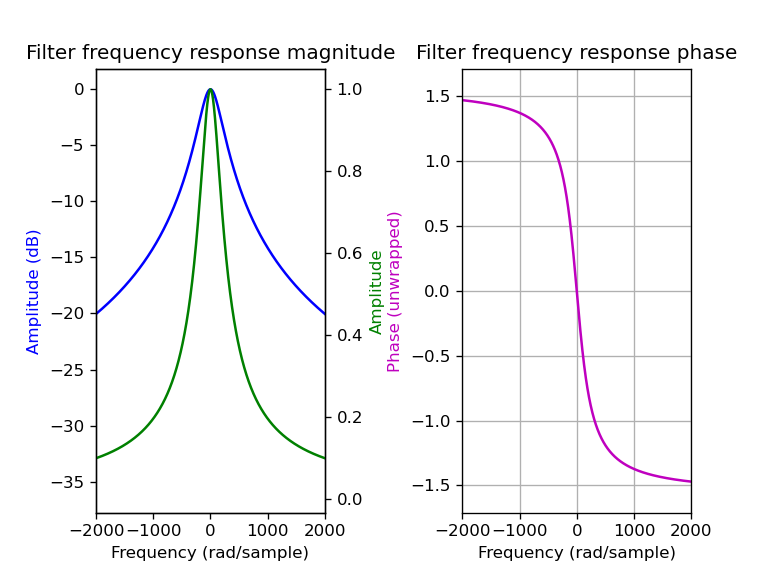

<IPython.core.display.Javascript object>


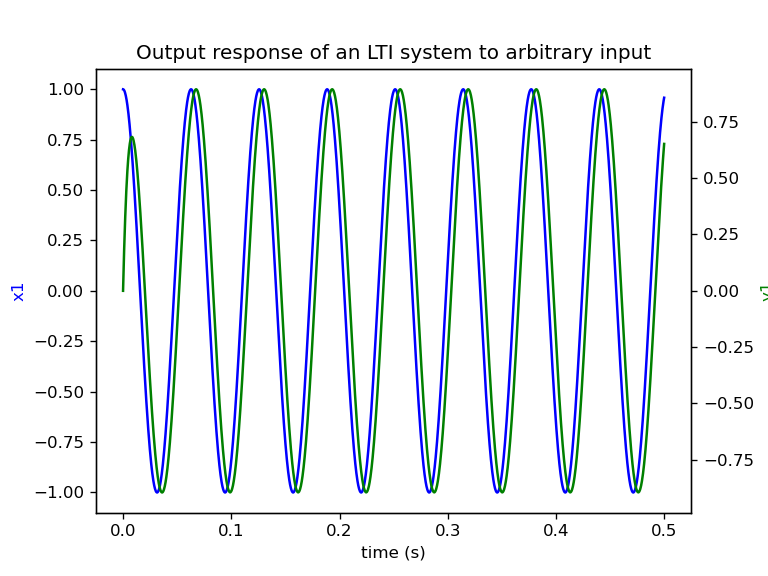

Text(0, 0.5, 'y1')

In [59]:
# Assignment 1: Filtering

# Part A
# TODO: create time vector and signal x1
fs = 4000
t = np.arange(0,0.5,1/fs)
x1 = np.cos(100*t)

# Part B
# TODO: define filter
nfft = 8192
b = [200]
a = [1,200]
sys = signal.lti(b,a)

f = np.arange(-nfft/2,nfft/2,1)*(fs/nfft)
omega = f*2*np.pi
omega2,h1_f = signal.freqresp(sys,omega)

ax1 = plt.figure(1)
plt.subplots_adjust(hspace=0.4, wspace=0.6)
ax1 = plt.subplot(121)
ax1.plot(omega, 20*np.log10(abs(h1_f)),'b')
ax1.set_title('Filter frequency response magnitude')
ax1.set_xlim(-2000,2000)
ax1.set_ylabel('Amplitude (dB)', color='b')
ax1.set_xlabel('Frequency (rad/sample)')
ax2 = ax1.twinx()
ax2.plot(omega, abs(h1_f),'g')
ax2.set_ylabel('Amplitude', color='g')

ax3 = plt.subplot(122)
ax3.set_title('Filter frequency response phase')
angles = np.unwrap(np.angle(h1_f))
ax3.plot(omega, angles, 'm')
ax3.set_ylabel('Phase (unwrapped)', color='m')
ax3.set_xlabel('Frequency (rad/sample)')
ax3.grid()
ax3.axis('tight')
ax3.set_xlim(-2000,2000)


# Part C
# TODO: plot x1 and y1
ty,y1,xs = signal.lsim((b,a),x1,t)
ax4 = plt.figure(2)
ax4 = plt.subplot(111)
ax4.plot(t,x1,color='b')
ax4.set_title('Output response of an LTI system to arbitrary input')
ax4.set_xlabel('time (s)')
ax4.set_ylabel('x1',color='b')
ax5 = ax4.twinx()
ax5.plot(ty,y1,color='g')
ax5.set_ylabel('y1',color='g')

## Discussion #1
Since the filter is not ideal, the output of two in series will be lesser and also shifted slightly to the right in time domain.

# Assignment 2 --  Amplitude Modulation

<IPython.core.display.Javascript object>


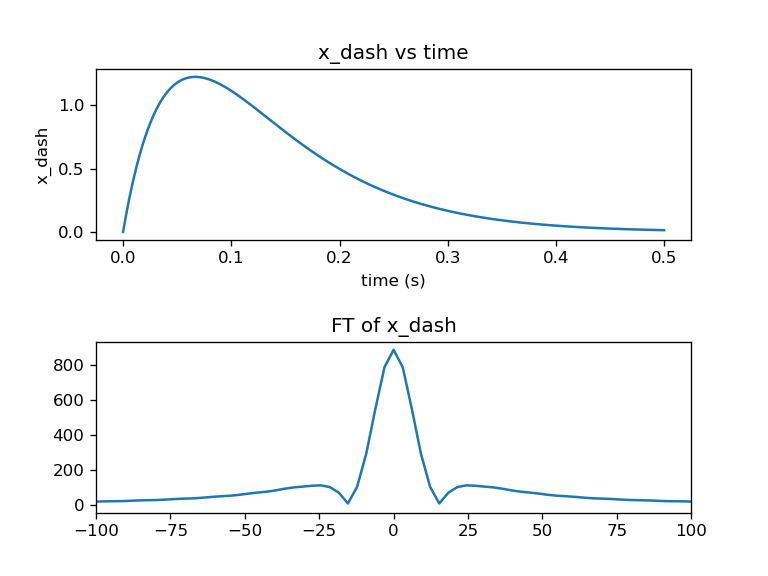

<IPython.core.display.Javascript object>


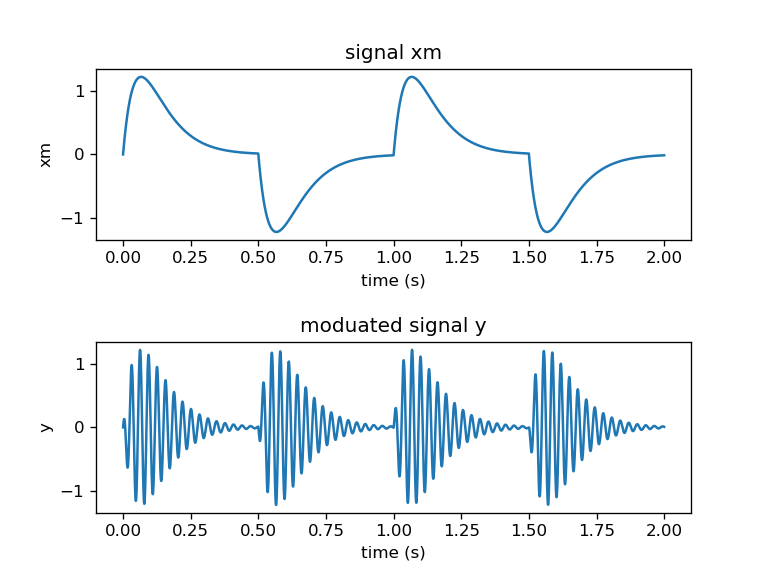

<IPython.core.display.Javascript object>


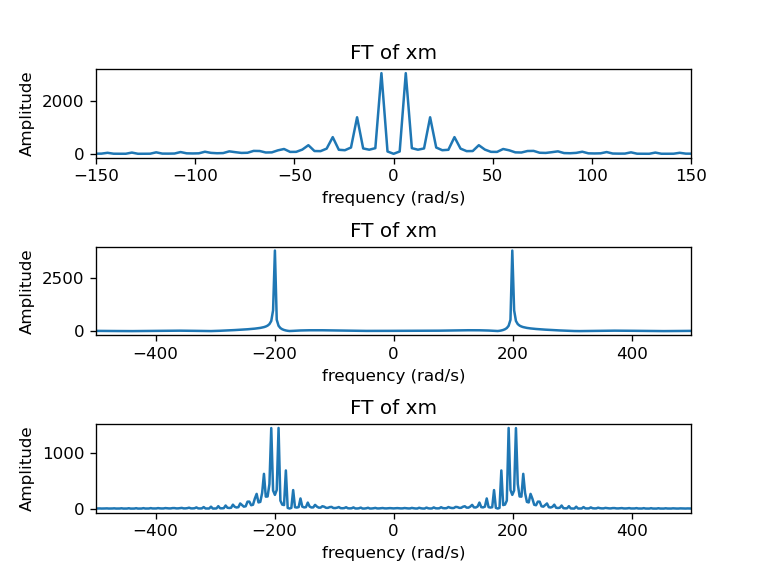

(-500.0, 500.0)

In [45]:
# Assignment 2: Amplitude Modulation

# t: input time vector array
# returns: array of 0s below t = 0 and 1 for t > 1
def u(t):
    return 1.0*(t>0)

# Part A 
# TODO: create 2 signals and plot x1 and magnitude of FT
fs = 4000
t = np.arange(0,0.5,1/fs)
x_dash = 50*t*np.exp(-15*t)*u(t)
x_dot = -x_dash
xf = np.fft.fft(x_dash,nfft).real
xfs = abs(np.fft.fftshift(xf)) # shift FFT of xf to be centered around 0
f = np.arange(-fs/2,fs/2,fs/nfft) * (2*np.pi)

figure3 = plt.figure(3)
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.subplot(2,1,1)
plt.plot(t,x_dash)
plt.title('x_dash vs time')
plt.ylabel('x_dash')
plt.xlabel('time (s)')
plt.subplot(2,1,2)
plt.plot(f,np.abs(xfs))
plt.title('FT of x_dash')
plt.xlim(-100,100)

# Part B
# TODO: create message signal
xm = np.concatenate([x_dash, x_dot, x_dash, x_dot]) # message signal for [1010]
t_xm = np.arange(0,2,1/fs)
c = np.cos(200*t_xm) # carrier signal
y = xm*c # modulated signal

# Part C
# TODO: plot xm and y
t_y = np.arange(0,len(y)/fs,1/fs)

figure4 = plt.figure(4)
plt.subplots_adjust(hspace=0.6, wspace=0.4)
plt.subplot(2,1,1)
plt.plot(t_xm,xm)
plt.title('signal xm')
plt.xlabel('time (s)')
plt.ylabel('xm')
plt.subplot(2,1,2)
plt.plot(t_y,y)
plt.title('moduated signal y')
plt.ylabel('y')
plt.xlabel('time (s)')

# Part D
# TODO: plot magnitude of FT of xm, c, y
ftxm = np.fft.fft(xm,nfft)
ftxm = np.abs(np.fft.fftshift(ftxm))
ftc = np.fft.fft(c,nfft)
ftc = np.abs(np.fft.fftshift(ftc))
fty = np.fft.fft(y,nfft)
fty = np.abs(np.fft.fftshift(fty))

figure5 = plt.figure(5)
plt.subplots_adjust(hspace=1, wspace=0.4)
plt.subplot(3,1,1)
plt.plot(f,ftxm)
plt.title('FT of xm')
plt.xlabel('frequency (rad/s)')
plt.ylabel('Amplitude')
plt.xlim(-150,150)
plt.subplot(3,1,2)
plt.plot(f,ftc)
plt.title('FT of xm')
plt.xlabel('frequency (rad/s)')
plt.ylabel('Amplitude')
plt.xlim(-500,500)
plt.subplot(3,1,3)
plt.plot(f,fty)
plt.title('FT of xm')
plt.xlabel('frequency (rad/s)')
plt.ylabel('Amplitude')
plt.xlim(-500,500)


## Discussion #2
No, y(t) is not an LTI system. TI does not hold because there is a 't' outside of the function x(t). 
y(t-t0) = x(t-t0) * cos(t-t0)   !=   T{x(t-t0)} = x(t-t0) * cos(t)

# Assignment 3 -- Amplitude Demodulation

<IPython.core.display.Javascript object>


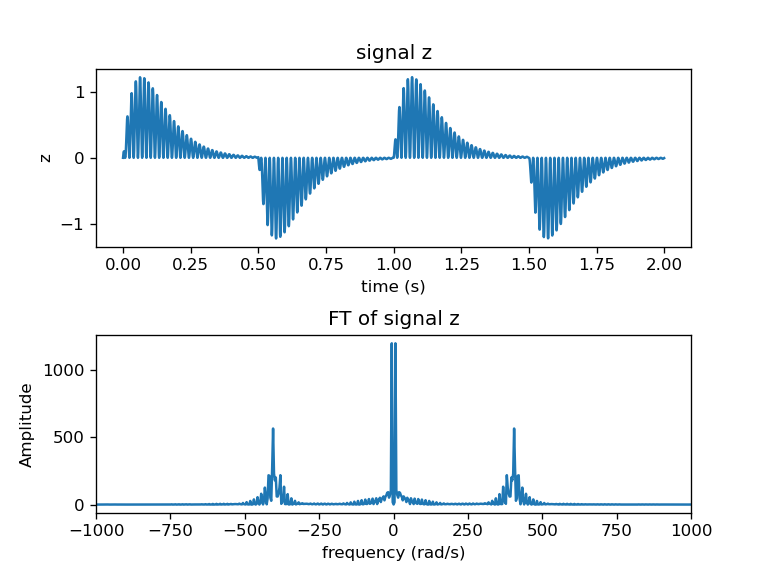

<IPython.core.display.Javascript object>


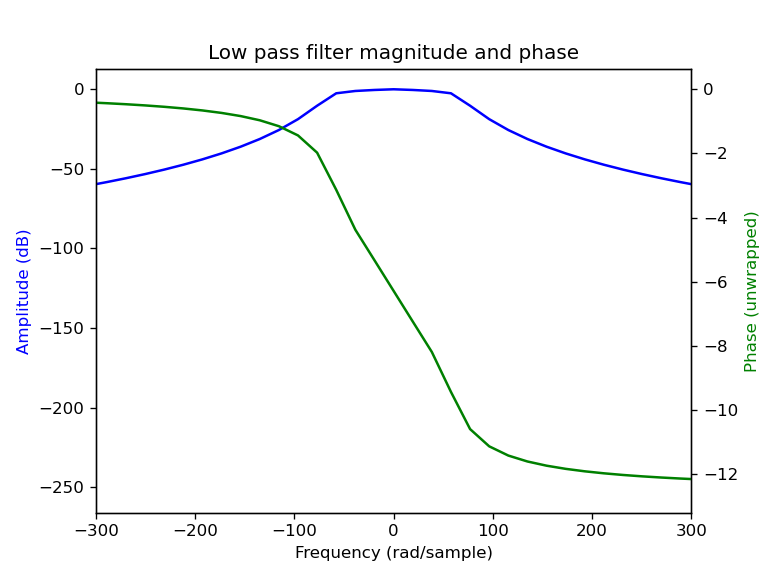

<IPython.core.display.Javascript object>


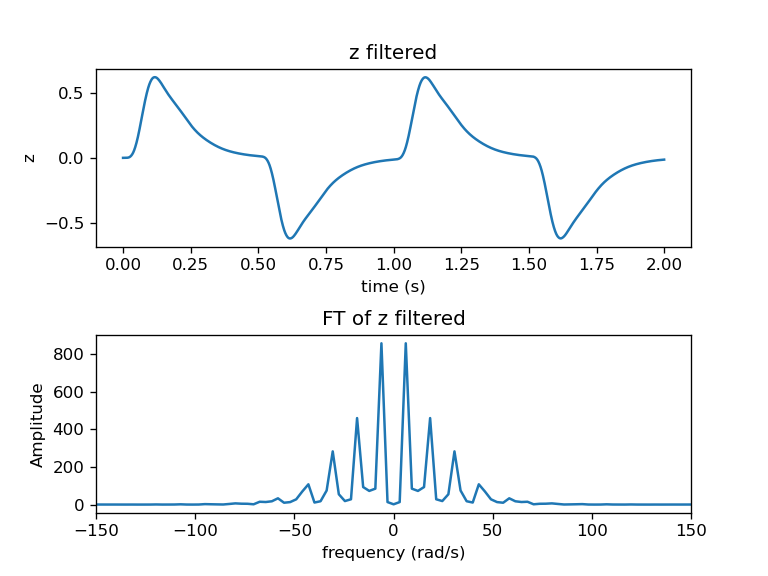

(-150.0, 150.0)

In [48]:
# Assignemnt 3: Amplitude Demodulation

# Part A
# TODO: create and model signal z
fs = 4000
nfft = 8192
z = y*c # signal z
ftz = np.fft.fft(z,nfft).real
ftz = np.abs(np.fft.fftshift(ftz))

figure6 = plt.figure(6)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.subplot(2,1,1)
plt.plot(t_xm,z)
plt.title('signal z')
plt.xlabel('time (s)')
plt.ylabel('z')
plt.subplot(2,1,2)
plt.plot(f, ftz)
plt.title('FT of signal z')
plt.xlabel('frequency (rad/s)')
plt.ylabel('Amplitude')
plt.xlim(-1000,1000)

# Part B
# TODO: create low-pass filter and plot frequency response magnitude and phase
a_lowpass = [240,3*10**4,2.2*10**6, 10**8, 2*10**9]
b_lowpass = [2*10**9]
lowpass_filter = signal.lti(b_lowpass,a_lowpass) # low pass filter
f_lowpass = np.arange(-nfft/2,nfft/2,1)*(fs/nfft)
omega_lowpass = f*2*np.pi
omega2_lowpass, h_lowpass = signal.freqresp(lowpass_filter, omega_lowpass) # frequency response

ax7_mag = plt.figure(7)
ax7_mag = plt.subplot(111)
ax7_mag.set_title('Low pass filter magnitude and phase')
ax7_mag.set_xlim(-300,300) # rad/s
ax7_mag.plot(omega_lowpass, 20*np.log10(abs(h_lowpass)),'b')
ax7_mag.set_ylabel('Amplitude (dB)', color='b')
ax7_mag.set_xlabel('Frequency (rad/sample)')
ax8_phase = ax7_mag.twinx()
angles_lowpass = np.unwrap(np.angle(h_lowpass))
ax8_phase.plot(omega_lowpass, angles_lowpass, 'g')
ax8_phase.set_ylabel('Phase (unwrapped)', color='g')
ax8_phase.set_xlim(-300,300)

# Part C
# TODO: use low pass filter to filter z; then plot signal and magnitude of FT
txr, xr, xrs = signal.lsim((b_lowpass, a_lowpass),z,t_y) # filtered z
ftxr = np.fft.fft(xr,nfft).real # FT of filtered z
ftxr = np.abs(np.fft.fftshift(ftxr)) # magnitude and shifted to be centered at 0

figure8 = plt.figure(8)
plt.subplots_adjust(hspace=0.5, wspace=0.4)
plt.subplot(2,1,1)
plt.plot(txr,xr)
plt.title('z filtered')
plt.xlabel('time (s)')
plt.ylabel('z')
plt.subplot(2,1,2)
plt.plot(f, ftxr)
plt.title('FT of z filtered')
plt.xlabel('frequency (rad/s)')
plt.ylabel('Amplitude')
plt.xlim(-150,150)

## Discussion #3
Aliasing will occur. The new signal has higher frequency and needs a filter that will accomodate that, which is why the solution is incorrect. 

# Assignment 4 -- Decoding a Morse Code Message

In [49]:
# Assignment 4: Decoding a Morse Code Message

# Part A
# TODO: write function to decode sequence of dots and dashes in received message

# y: input signal
# returns array of length 4 consisting of a sequence of 0s, dots, and/or dashes
def decode(y,w):
    # defining signals of dots and dashes
    fs = 4000
    t = np.arange(0,0.5,1/fs)
    t_y = np.arange(0,2,1/fs)
    x_dash = 50*t*np.exp(-15*t)*u(t)
    x_dot = -x_dash
    
    c = np.cos(w*t_y)
    demod = c*y
    tyr, yr, yrs = signal.lsim((b_lowpass, a_lowpass),demod,t_y)
    
    letter = np.zeros(4)
    for i in range(0,4):
        
        slot = yr[int(i * fs/2) : int((i + 1) * fs/2)]
        zeros = 0*t
        dot_error = np.sum(np.square(slot - x_dot))
        dash_error = np.sum(np.square(slot - x_dash))
        zero_error = 2*np.sum(np.square(slot - zeros))
        
        if (zero_error < dot_error and zero_error < dash_error): # zero is 0
            letter[i] = 0
        elif (dash_error < dot_error): # dash is 1
            letter[i] = 1
        else: # dot is 2
            letter[i] = 2
        
    # determine which letter the code corresponds to
    if letter[0] == 1: # dash...
        if letter[1] == 1: # dash dash...
            if letter[2] == 1: # dash dash dash
                return 'O'
            elif letter[2] == 2: # dash dash dot...
                if letter[3] == 1:
                    return 'Q'
                elif letter[3] == 2:
                    return 'Z'
                else:
                    return 'G'
            else: # dash dash space
                return 'M'
        elif letter[1] == 2: # dash dot...
            if letter[2] == 0: # dash dot space
                return 'N'
            elif letter[2] == 1: # dash dot dash...
                if letter[3] == 0: # dash dot dash space
                    return 'k'
                elif letter[3] == 1: # dash dot dash dash
                    return 'Y'
                else: # dash dot dash dot
                    return 'C'
            else: # dash dot dot...
                if letter[3] == 0: # dash dot dot space
                    return 'D'
                elif letter[3] == 1: # dash dot dot dash
                    return 'X'
                else: # dash dot dot dot
                    return 'B'
        else: # dash space
            return 'T'   
    elif letter[0] == 2: # dot...
        if letter[1] == 0: # dot space
            return 'E'
        elif letter[1] == 1: # dot dash...
            if letter[2] == 0: # dot dash space
                return 'A'
            elif letter[2] == 1: # dot dash dash...
                if letter[3] == 0: # dot dash dash space
                    return 'W'
                elif letter[3] == 1: # dot dash dash dash
                    return 'J'
                else: # dot dash dash dot
                    return 'P'
            else: # dot dash dot...
                if letter[2] == 0: # dot dash dot space
                    return 'R'
                else: # dot dash dot dot
                    return 'L'
        else: # dot dot...
            if letter[2] == 0: # dot dot space
                return 'I'
            elif letter[2] == 1: # dot dot dash...
                if letter[3] == 0: # dot dot dash space
                    return 'U' 
                else: # dot dot dash dot
                    return 'F'
            else: # dot dot dot...
                if letter[3] == 0: # dot dot dot space
                    return 'S'
                elif letter[3] == 1: # dot dot dot dash
                    return 'V'
                else: # dot dot dot dot
                    return 'H'

In [51]:
# Part A continued
# TODO: test decode function with modulated x signal
x = np.concatenate([x_dash, x_dot, x_dot, x_dash]) # X signal
x_modulated = x * np.cos(100*t_y)

decode(x,0)
decode(x_modulated,100)

'X'

In [55]:
# Part B
# TODO: load message csv file
file = open('message_modulated.csv', 'rb')
y = np.loadtxt(file, delimiter = ',')

# Part C
# TODO: write a loop that 1) assigns demodulating frequencies 2) demodulates signal then filters
#    3) prints message
fs = 4000
t = np.arange(0, 2, 1/fs)

w = [100,200,400]
for i in w:
    # demodulation occurs in for loop
    print("Message m" + str(w.index(i)+1) + "t is:", decode(y,i))

Message m1t is: Y
Message m2t is: O
Message m3t is: U


## Discussion #4
The matched filter would be more like an ideal filter because we used the step function instead of a first order equation. Thus the matched filter is more effective at comparing because there is less error from the signal we compare it to.